In [1]:
from io import BytesIO
import base64
from PIL import Image

In [2]:
DET_PATH = "pretrain_data_examples/detection_examples.tsv"
OUT_PATH = "outputs/detection_examples.tsv"

In [3]:
offset = 0
fp = open(DET_PATH, "r")
lineid_to_offset = []
for line in fp:
    lineid_to_offset.append(offset)
    offset += len(line.encode('utf-8'))
# fp = open(DET_PATH, "r")
# for line in fp:   
#     print(line.encode('utf-8'))
#     break

In [5]:
targets = ""
for j, offset in enumerate(lineid_to_offset):
    targets += f"{j+1}\t"
    fp.seek(offset)
    image_id, image, label = fp.readline().rstrip("\n").split("\t")
    img = Image.open(BytesIO(base64.urlsafe_b64decode(image))).convert("RGB")
    
    # # バイナリデータをnumpy配列に変換する
    # img_array = np.frombuffer(binary_data, dtype=np.uint8)
    # print(img_array, img_array.shape)
    # image = cv2.imdecode(img_array, 3)
    # _, img_array = cv2.imencode('.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 75, cv2.IMWRITE_JPEG_PROGRESSIVE, 1])
    # print(img_array, img_array.shape)
    
    img_buffer = BytesIO()
    img.save(img_buffer, format="png")
    byte_data = img_buffer.getvalue()
    base64_str = base64.b64encode(byte_data) # bytes
    base64_str = base64_str.decode("utf-8") # str
    
    # NumPy配列をバイト文字列に変換し、Base64エンコードする
    # img_bytes = img_array.tobytes()
    targets += base64_str+'\t'
    
    # buffered = BytesIO()
    # image.save(buffered, format="JPEG", quality=75)
    # img_str = base64.b64encode(buffered.getvalue())
    # targets += img_str.decode('utf-8')+'\t'

    boxes_target = {"boxes": [], "ids": [],"labels": [], "area": []}
    label_list = label.strip().split('&&')
    for label in label_list:
        x0, y0, x1, y1, cat_id, cat = label.strip().split(',', 5)
        x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
        boxes_target["boxes"].append([x0, y0, x1, y1])
        boxes_target["ids"].append(cat_id)
        boxes_target["labels"].append(cat)
    
    for i, (bbox, cat_id, cat) in enumerate(zip(boxes_target["boxes"], boxes_target["ids"], boxes_target["labels"])):
        target = ",".join(map(str, bbox))
        target += "," + str(cat_id)
        target += "," + str(cat)
        if i != len(boxes_target["boxes"])-1:
            target += "&&"
        targets += target
    targets += "\n"
    
with open(OUT_PATH, "w", encoding='utf-8') as f:
    f.write(targets)

In [6]:
offset2 = 0
fp2 = open(OUT_PATH, "r")
lineid_to_offset2 = []
for line in fp2:
    lineid_to_offset2.append(offset2)

(1024, 574) (1024, 574)


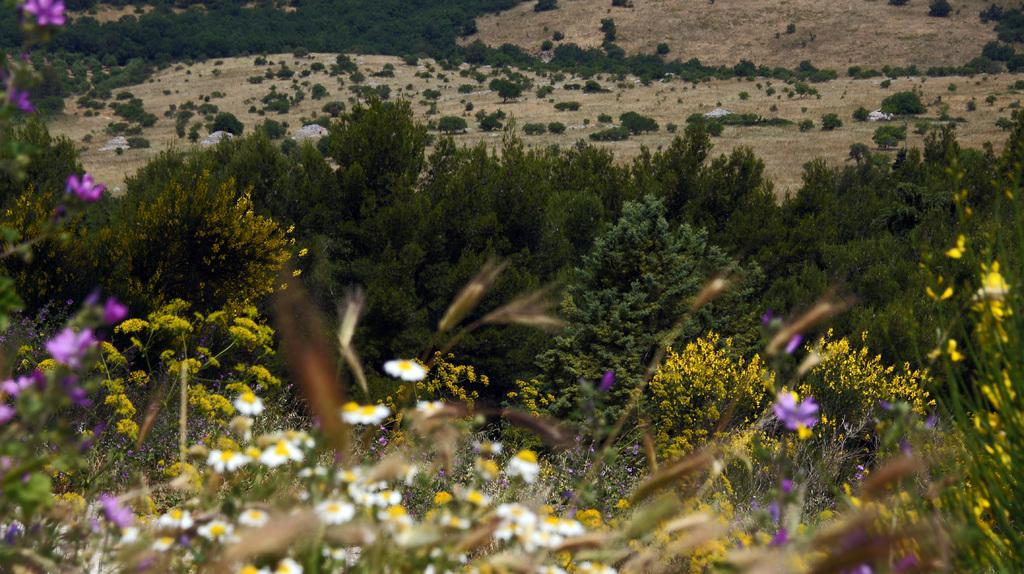

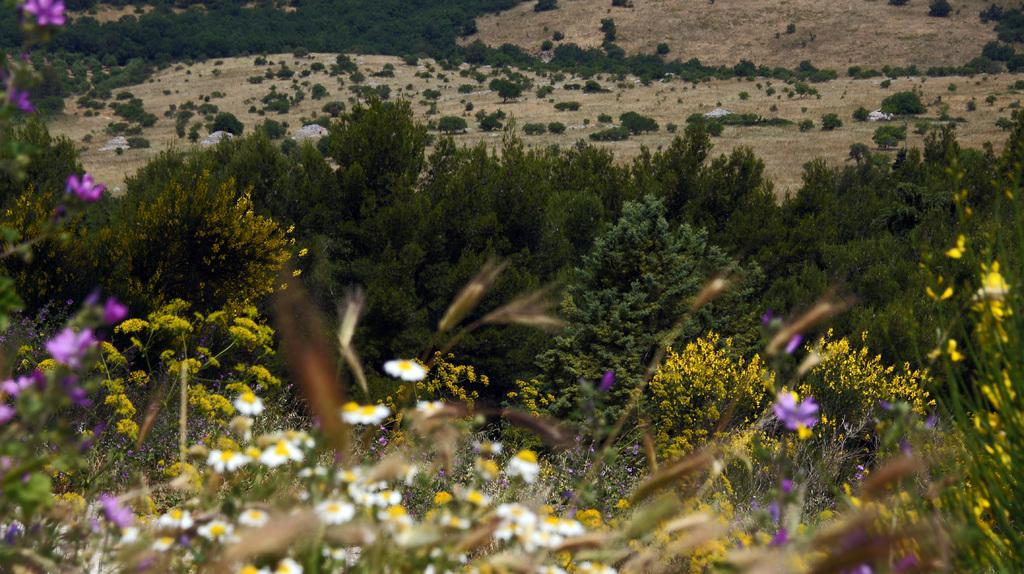

(0,)
1763328


In [7]:
import numpy as np

for offset, offset2 in zip(lineid_to_offset, lineid_to_offset2):
    fp.seek(offset)
    image_id, image1, label = fp.readline().rstrip("\n").split("\t")
    image1 = Image.open(BytesIO(base64.urlsafe_b64decode(image1)))#.convert("RGB")
    
    fp2.seek(offset2)
    image_id, image2, label = fp2.readline().rstrip("\n").split("\t")
    image2 = Image.open(BytesIO(base64.urlsafe_b64decode(image2)))#.convert("RGB")
    print(image1.size, image2.size)
    
    display(image1)
    display(image2)
    
    image1 = np.array(image1)
    image2 = np.array(image2)
    
    diff = image1 - image2
    print(diff[diff != 0].shape)
    print(image1.shape[0]*image1.shape[1]*image1.shape[2])
    break